In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# df = pd.read_csv("/media/mleanie/MELANIE/Package_1189764/image03.txt", delimiter="\t")
df = pd.read_csv("pheno_files/image03.txt", delimiter="\t")

/home/mleanie/p3_pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (0,1,2,4,6,8,9,10,12,16,17,22,23,24,25,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.shape

(801215, 112)

In [8]:
df.columns

Index(['collection_id', 'image03_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex',
       'comments_misc', 'image_file',
       ...
       'in_stack', 'decon_template_name', 'stack', 'slices', 'slice_number',
       'slice_thickness', 'type_of_microscopy', 'excitation_wavelength',
       'year_mta', 'collection_title'],
      dtype='object', length=112)

In [9]:
df.qc_outcome.dropna()

0         Provide information on the conclusion of the q...
97078                                          undetermined
97079                                                  pass
97080                                          undetermined
97081                                                  pass
                                ...                        
436081                                                 pass
436082                                                 fail
436083                                                 fail
436084                                                 fail
436085                                         questionable
Name: qc_outcome, Length: 47665, dtype: object

In [10]:
df.scan_type.value_counts()

Field Map                 316263
fMRI                      302079
MR structural (T1)         67665
MR structural (T2)         58205
multi-shell DTI            37348
MR diffusion               15110
Localizer scan              1767
MR structural (TSE)         1450
pCASL: ASL                  1310
MR structural (MPRAGE)        17
Type of Scan                   1
Name: scan_type, dtype: int64

In [11]:
subdf = df.iloc[df.qc_outcome.dropna().index]
subdf = subdf[(subdf.scan_type == "MR structural (T1)") | (subdf.scan_type == "MR structural (MPRAGE)")]

In [12]:
subdf["image_file"]

97094     s3://NDAR_Central_1/submission_23920/BCP/work/...
97095     s3://NDAR_Central_1/submission_23920/BCP/work/...
97103     s3://NDAR_Central_1/submission_23924/BCP/work/...
97107     s3://NDAR_Central_1/submission_23924/BCP/work/...
97128     s3://NDAR_Central_1/submission_23932/BCP/work/...
                                ...                        
436072    s3://NDAR_Central_4/submission_31567/BCP/xnat_...
436073    s3://NDAR_Central_4/submission_31571/BCP/xnat_...
436076    s3://NDAR_Central_4/submission_31571/BCP/xnat_...
436077    s3://NDAR_Central_4/submission_31571/BCP/xnat_...
436085    s3://NDAR_Central_4/submission_31571/BCP/xnat_...
Name: image_file, Length: 7375, dtype: object

In [13]:
subdf["qc_outcome"].value_counts()

pass            4326
questionable    1615
undetermined     864
fail             570
Name: qc_outcome, dtype: int64

In [14]:
# subdf["image_file"].to_csv("ABCD_files_T1w_qc_available.csv", header=None, index=None)

In [15]:
subdf.image_file_format.value_counts()

NIFTI    3839
DICOM    3536
Name: image_file_format, dtype: int64

In [16]:
subdf_nii = subdf[subdf.image_file_format == "NIFTI"]

In [17]:
# subdf_nii["image_file"].to_csv("ABCD_nii_files_T1w_qc_available.csv", header=None, index=None)

In [18]:
subdf_nii["qc_outcome"].value_counts()

pass            2266
questionable     857
undetermined     421
fail             295
Name: qc_outcome, dtype: int64

In [19]:
subdf_nii.image_description.value_counts()

T1w_MPR                3829
T1w_MPR_pt6               4
T1w_MPR_pt6_nofat         4
rfMRI_REST_PA             1
rfMRI_REST_PA_SBRef       1
Name: image_description, dtype: int64

In [20]:
sub_subdf_nii = subdf_nii[(subdf_nii["qc_outcome"] == "pass") | (subdf_nii["qc_outcome"] == "questionable") | (subdf_nii["qc_outcome"] == "fail")][["image_file", "qc_outcome", "src_subject_id", "interview_age", "sex"]]

In [21]:
sub_subdf_nii["filename"] = sub_subdf_nii["image_file"].apply(lambda x: x.split("/")[-1])

In [22]:
sub_subdf_nii

,image_file,qc_outcome,src_subject_id,interview_age,sex,filename
97094,s3://NDAR_Central_1/submission_23920/BCP/work/...,questionable,176427,5,F,20160811-ST001-Elison_BSLERP_176427_01_01_MR-S...
97095,s3://NDAR_Central_1/submission_23920/BCP/work/...,questionable,176427,5,F,20160811-ST001-Elison_BSLERP_176427_01_01_MR-S...
97103,s3://NDAR_Central_1/submission_23924/BCP/work/...,pass,185373,26,M,20190119-ST001-MNBCP185373-v02-1-26mo_MR-SE002...
97107,s3://NDAR_Central_1/submission_23924/BCP/work/...,pass,185373,26,M,20190119-ST001-MNBCP185373-v02-1-26mo_MR-SE003...
97128,s3://NDAR_Central_1/submission_23932/BCP/work/...,pass,261266,17,M,20180810-ST001-MNBCP261266-v01-1-17mo_MR-SE002...
...,...,...,...,...,...,...
436072,s3://NDAR_Central_4/submission_31567/BCP/xnat_...,fail,945890,60,M,NCBCP945890-v01-1-60mo_9_T1w.nii.gz
436073,s3://NDAR_Central_4/submission_31571/BCP/xnat_...,questionable,968715,37,M,BCP-968715-37mo-v1_10_T1w.nii.gz
436076,s3://NDAR_Central_4/submission_31571/BCP/xnat_...,questionable,968715,37,M,BCP-968715-37mo-v1_13_T1w.nii.gz
436077,s3://NDAR_Central_4/submission_31571/BCP/xnat_...,questionable,968715,37,M,BCP-968715-37mo-v1_14_T1w.nii.gz


In [23]:
# sub_subdf_nii.to_csv("download_ABCD_nii_files_T1w_qc_available.csv", header=None, index=None)
# sub_subdf_nii = pd.read_csv("./download_ABCD_nii_files_T1w_qc_available.csv", header=None)
# sub_subdf_nii.columns = ["image_file", "qc_outcome", "filename"] 

In [24]:
len(set(sub_subdf_nii.filename))

2142

In [25]:
down_files = pd.read_csv("downloaded_abcd_files.csv", header=None)
down_files.columns = ["filename"]

In [26]:
down_files.shape[0]

2141

In [27]:
# We consider that for many rows having the same filename, age and qc_outcome, then we can keep only one of the row
filenames_to_keep = []
qc_filenames_to_keep = []
age_filenames_to_keep = []
sex_filenames_to_keep = []
for el in set(sub_subdf_nii.filename):
    el_df = sub_subdf_nii[sub_subdf_nii.filename == el]
    if (len(set(el_df.qc_outcome)) == 1) & (len(set(el_df.interview_age)) == 1):
        filenames_to_keep.append(el)
        qc_filenames_to_keep.append(list(set(el_df.qc_outcome))[0])
        age_filenames_to_keep.append(list(set(el_df.interview_age))[0])
        sex_filenames_to_keep.append(list(set(el_df.sex))[0])

In [28]:
len(filenames_to_keep)

2101

In [29]:
len(set(down_files["filename"]) & set(filenames_to_keep))

2100

In [30]:
# 41 files downloaded with different QC or different ages
filenames_to_check = list(set(down_files["filename"]).difference(set(filenames_to_keep)))

In [31]:
qc_filenames_to_check = []
age_filenames_to_check = []
sex_filenames_to_check = []
for el in filenames_to_check:
    el_df = sub_subdf_nii[sub_subdf_nii.filename == el]
    last_row = el_df.shape[0] - 1 
    #print(pd.concat([el_df.image_file.apply(lambda x: x.split("/")[5]), el_df["qc_outcome"]], axis=1).iloc[last_row])
    qc_filenames_to_check.append(el_df["qc_outcome"].iloc[last_row])
    age_filenames_to_check.append(el_df["interview_age"].iloc[last_row])
    sex_filenames_to_check.append(el_df["sex"].iloc[last_row])

In [32]:
len(qc_filenames_to_check)

41

In [33]:
sub_subdf_nii_to_check = pd.DataFrame({"filename": filenames_to_check, "qc_outcome": qc_filenames_to_check,
                                      "interview_age": age_filenames_to_check, "sex": sex_filenames_to_check})
sub_subdf_nii_to_keep = pd.DataFrame({"filename": filenames_to_keep, "qc_outcome": qc_filenames_to_keep,
                                     "interview_age": age_filenames_to_keep, "sex": sex_filenames_to_keep})
sub_subdf_nii_to_keep = sub_subdf_nii_to_keep[[x in down_files.filename.tolist() for x in sub_subdf_nii_to_keep.filename]]

down_files_info = pd.concat([sub_subdf_nii_to_check, sub_subdf_nii_to_keep], axis=0)

In [34]:
down_files_info

,filename,qc_outcome,interview_age,sex
0,BCP-106436-2wk-v1_6_T1w.nii.gz,questionable,0,F
1,BCP-439967-42mo-v1_19_T1w.nii.gz,fail,42,F
2,BCP-017541-10mo-v1_13_T1w.nii.gz,pass,10,F
3,BCP-017541-10mo-v1_12_T1w.nii.gz,pass,10,F
4,BCP-648807-27mo-v3_10_T1w.nii.gz,questionable,27,M
...,...,...,...,...
2096,794626-BSLERP-20160106_7_T1w_Defaced.nii.gz,pass,11,F
2097,20180619-ST001-MNBCP710922-v01-01-1mo_MR-SE004...,questionable,1,M
2098,NCBCP433089-v01-1-15mo_2_T1w.nii.gz,pass,15,F
2099,20160328-ST002-Elison_BSLERP_505499_03_01_MR-S...,fail,12,F


In [35]:
down_files_info.interview_age.describe()

count    2141.000000
mean       16.885100
std        14.882841
min         0.000000
25%         6.000000
50%        12.000000
75%        23.000000
max        81.000000
Name: interview_age, dtype: float64

In [36]:
down_files_info.sex.value_counts()

F    1145
M     996
Name: sex, dtype: int64

In [37]:
# down_files_info.to_csv("downloaded_files_info.csv", index=None)

!!! Attention !!!

Compare if "defaced" has an effect on detection of quality 

In [38]:
defaced_core_filenames = down_files[["Defaced" in x for x in down_files.filename]]
defaced_core_filenames = defaced_core_filenames.filename.apply(lambda x: "".join(x.split("_Defaced")))

In [39]:
len(defaced_core_filenames)

218

In [40]:
corresponding_undefaced_core_filenames = []
for el in defaced_core_filenames:
    el_df = down_files[down_files.filename == el]
    if el_df.shape[0] > 0:
        corresponding_undefaced_core_filenames.append(el_df.filename.iloc[0])

In [41]:
len(corresponding_undefaced_core_filenames)

218

In [42]:
# 218 files to remove
# pd.DataFrame(corresponding_undefaced_core_filenames).to_csv("./abcd_files_downloaded_to_rm.csv", header=None, index=None)

!!! Also compare results according to scanner type 

In [43]:
cols_scanner = ['scanner_manufacturer_pd', 'scanner_type_pd', 'scanner_software_versions_pd',
                'magnetic_field_strength', 'mri_repetition_time_pd', 'mri_echo_time_pd',
                'flip_angle', 'acquisition_matrix', 'mri_field_of_view_pd', 'patient_position',
                'photomet_interpret', 'receive_coil', 'transmit_coil', 'transformation_performed',
                'transformation_type']

In [44]:
list(subdf_nii.columns)

['collection_id',
 'image03_id',
 'dataset_id',
 'subjectkey',
 'src_subject_id',
 'interview_date',
 'interview_age',
 'sex',
 'comments_misc',
 'image_file',
 'image_thumbnail_file',
 'image_description',
 'experiment_id',
 'scan_type',
 'scan_object',
 'image_file_format',
 'data_file2',
 'data_file2_type',
 'image_modality',
 'scanner_manufacturer_pd',
 'scanner_type_pd',
 'scanner_software_versions_pd',
 'magnetic_field_strength',
 'mri_repetition_time_pd',
 'mri_echo_time_pd',
 'flip_angle',
 'acquisition_matrix',
 'mri_field_of_view_pd',
 'patient_position',
 'photomet_interpret',
 'receive_coil',
 'transmit_coil',
 'transformation_performed',
 'transformation_type',
 'image_history',
 'image_num_dimensions',
 'image_extent1',
 'image_extent2',
 'image_extent3',
 'image_extent4',
 'extent4_type',
 'image_extent5',
 'extent5_type',
 'image_unit1',
 'image_unit2',
 'image_unit3',
 'image_unit4',
 'image_unit5',
 'image_resolution1',
 'image_resolution2',
 'image_resolution3',
 'im

# Results

In [45]:
sub_subdf_nii2 = subdf_nii[(subdf_nii["qc_outcome"] == "pass") | (subdf_nii["qc_outcome"] == "questionable") | (subdf_nii["qc_outcome"] == "fail")]
sub_subdf_nii2["filename"] = sub_subdf_nii2["image_file"].apply(lambda x: x.split("/")[-1])

/tmp/ipykernel_22088/2480920896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_subdf_nii2["filename"] = sub_subdf_nii2["image_file"].apply(lambda x: x.split("/")[-1])


In [46]:
list(subdf_nii.columns)

['collection_id',
 'image03_id',
 'dataset_id',
 'subjectkey',
 'src_subject_id',
 'interview_date',
 'interview_age',
 'sex',
 'comments_misc',
 'image_file',
 'image_thumbnail_file',
 'image_description',
 'experiment_id',
 'scan_type',
 'scan_object',
 'image_file_format',
 'data_file2',
 'data_file2_type',
 'image_modality',
 'scanner_manufacturer_pd',
 'scanner_type_pd',
 'scanner_software_versions_pd',
 'magnetic_field_strength',
 'mri_repetition_time_pd',
 'mri_echo_time_pd',
 'flip_angle',
 'acquisition_matrix',
 'mri_field_of_view_pd',
 'patient_position',
 'photomet_interpret',
 'receive_coil',
 'transmit_coil',
 'transformation_performed',
 'transformation_type',
 'image_history',
 'image_num_dimensions',
 'image_extent1',
 'image_extent2',
 'image_extent3',
 'image_extent4',
 'extent4_type',
 'image_extent5',
 'extent5_type',
 'image_unit1',
 'image_unit2',
 'image_unit3',
 'image_unit4',
 'image_unit5',
 'image_resolution1',
 'image_resolution2',
 'image_resolution3',
 'im

In [47]:
sub_subdf_nii.head()

,image_file,qc_outcome,src_subject_id,interview_age,sex,filename
97094,s3://NDAR_Central_1/submission_23920/BCP/work/...,questionable,176427,5,F,20160811-ST001-Elison_BSLERP_176427_01_01_MR-S...
97095,s3://NDAR_Central_1/submission_23920/BCP/work/...,questionable,176427,5,F,20160811-ST001-Elison_BSLERP_176427_01_01_MR-S...
97103,s3://NDAR_Central_1/submission_23924/BCP/work/...,pass,185373,26,M,20190119-ST001-MNBCP185373-v02-1-26mo_MR-SE002...
97107,s3://NDAR_Central_1/submission_23924/BCP/work/...,pass,185373,26,M,20190119-ST001-MNBCP185373-v02-1-26mo_MR-SE003...
97128,s3://NDAR_Central_1/submission_23932/BCP/work/...,pass,261266,17,M,20180810-ST001-MNBCP261266-v01-1-17mo_MR-SE002...


In [48]:
subdf_nii["image_file"].apply(lambda x: x.split("/")[3])

97094     submission_23920
97095     submission_23920
97103     submission_23924
97107     submission_23924
97128     submission_23932
                ...       
436072    submission_31567
436073    submission_31571
436076    submission_31571
436077    submission_31571
436085    submission_31571
Name: image_file, Length: 3839, dtype: object

In [49]:
len(set(sub_subdf_nii2.image03_id))

3418

In [50]:
# qc_fail_quest_reason
# qc_description
# image_slice_thickness
# flip_angle
# acquisition_matrix
# magnetic_field_strength
# mri_repetition_time_pd
# mri_echo_time_pd

# scanner_manufacturer_pd
# scanner_type_pd
# scanner_software_versions_pd

# image03_id

In [51]:
filenames_to_keep = []
img_file_to_keep = []
qc_filenames_to_keep = []
age_filenames_to_keep = []
fov_filenames_to_keep = []
qc_fail_quest_reason_filenames_to_keep = []
qc_description_filenames_to_keep = []
image_slice_thickness_filenames_to_keep = []
flip_angle_filenames_to_keep = []
acquisition_matrix_filenames_to_keep = []
magnetic_field_strength_filenames_to_keep = []
mri_repetition_time_pd_filenames_to_keep = []
mri_echo_time_pd_filenames_to_keep = []
image03_id_to_keep = []
for el in set(sub_subdf_nii.filename):
    el_df = sub_subdf_nii2[sub_subdf_nii2.filename == el]
    if (len(set(el_df.qc_outcome)) == 1) & (len(set(el_df.interview_age)) == 1):
        filenames_to_keep.append(el)
        img_file_to_keep.append(list(set(el_df.image_file))[0])
        qc_filenames_to_keep.append(list(set(el_df.qc_outcome))[0])
        age_filenames_to_keep.append(list(set(el_df.interview_age))[0])
        fov_filenames_to_keep.append(list(set(el_df.mri_field_of_view_pd))[0])
        qc_fail_quest_reason_filenames_to_keep.append(list(set(el_df.qc_fail_quest_reason))[0])
        qc_description_filenames_to_keep.append(list(set(el_df.qc_description))[0])
        image_slice_thickness_filenames_to_keep.append(list(set(el_df.image_slice_thickness))[0])
        flip_angle_filenames_to_keep.append(list(set(el_df.flip_angle))[0])
        acquisition_matrix_filenames_to_keep.append(list(set(el_df.acquisition_matrix))[0])
        magnetic_field_strength_filenames_to_keep.append(list(set(el_df.magnetic_field_strength))[0])
        mri_repetition_time_pd_filenames_to_keep.append(list(set(el_df.mri_repetition_time_pd))[0])
        mri_echo_time_pd_filenames_to_keep.append(list(set(el_df.mri_echo_time_pd))[0])
        image03_id_to_keep.append(list(set(el_df.image03_id))[0])
        

In [52]:
img_file_to_check = []
qc_filenames_to_check = []
age_filenames_to_check = []
fov_filenames_to_check = []
qc_fail_quest_reason_filenames_to_check = []
qc_description_filenames_to_check = []
image_slice_thickness_filenames_to_check = []
flip_angle_filenames_to_check = []
acquisition_matrix_filenames_to_check = []
magnetic_field_strength_filenames_to_check = []
mri_repetition_time_pd_filenames_to_check = []
mri_echo_time_pd_filenames_to_check = []
image03_id_to_check = []
for el in filenames_to_check:
    el_df = sub_subdf_nii2[sub_subdf_nii2.filename == el]
    last_row = el_df.shape[0] - 1 
    #print(pd.concat([el_df.image_file.apply(lambda x: x.split("/")[5]), el_df["qc_outcome"]], axis=1).iloc[last_row])
    img_file_to_check.append(el_df["image_file"].iloc[last_row])
    qc_filenames_to_check.append(el_df["qc_outcome"].iloc[last_row])
    age_filenames_to_check.append(el_df["interview_age"].iloc[last_row])
    fov_filenames_to_check.append(el_df["mri_field_of_view_pd"].iloc[last_row])
    qc_fail_quest_reason_filenames_to_check.append(el_df["qc_fail_quest_reason"].iloc[last_row])
    qc_description_filenames_to_check.append(el_df["qc_description"].iloc[last_row])
    image_slice_thickness_filenames_to_check.append(el_df["image_slice_thickness"].iloc[last_row])
    flip_angle_filenames_to_check.append(el_df["flip_angle"].iloc[last_row])
    acquisition_matrix_filenames_to_check.append(el_df["acquisition_matrix"].iloc[last_row])
    magnetic_field_strength_filenames_to_check.append(el_df["magnetic_field_strength"].iloc[last_row])
    mri_repetition_time_pd_filenames_to_check.append(el_df["mri_repetition_time_pd"].iloc[last_row])
    mri_echo_time_pd_filenames_to_check.append(el_df["mri_echo_time_pd"].iloc[last_row])
    image03_id_to_check.append(el_df["image03_id"].iloc[last_row])

In [53]:
sub_subdf_nii_to_check = pd.DataFrame({"filename": filenames_to_check, "image_file": img_file_to_check, "qc_outcome": qc_filenames_to_check,
                                      "interview_age": age_filenames_to_check, "mri_field_of_view_pd": fov_filenames_to_check,
                                      "qc_fail_quest_reason": qc_fail_quest_reason_filenames_to_check, "qc_description": qc_description_filenames_to_check,
                                      "image_slice_thickness": image_slice_thickness_filenames_to_check, "flip_angle": flip_angle_filenames_to_check,
                                      "acquisition_matrix": acquisition_matrix_filenames_to_check, "magnetic_field_strength": magnetic_field_strength_filenames_to_check,
                                      "mri_repetition_time_pd": mri_repetition_time_pd_filenames_to_check, "mri_echo_time_pd": mri_echo_time_pd_filenames_to_check,
                                      "image03_id": image03_id_to_check})

sub_subdf_nii_to_keep = pd.DataFrame({"filename": filenames_to_keep, "image_file": img_file_to_keep, "qc_outcome": qc_filenames_to_keep,
                                     "interview_age": age_filenames_to_keep, "mri_field_of_view_pd": fov_filenames_to_keep,
                                      "qc_fail_quest_reason": qc_fail_quest_reason_filenames_to_keep, "qc_description": qc_description_filenames_to_keep,
                                      "image_slice_thickness": image_slice_thickness_filenames_to_keep, "flip_angle": flip_angle_filenames_to_keep,
                                      "acquisition_matrix": acquisition_matrix_filenames_to_keep, "magnetic_field_strength": magnetic_field_strength_filenames_to_keep,
                                      "mri_repetition_time_pd": mri_repetition_time_pd_filenames_to_keep, "mri_echo_time_pd": mri_echo_time_pd_filenames_to_keep,
                                      "image03_id": image03_id_to_keep})
sub_subdf_nii_to_keep = sub_subdf_nii_to_keep[[x in down_files.filename.tolist() for x in sub_subdf_nii_to_keep.filename]]

down_files_info = pd.concat([sub_subdf_nii_to_check, sub_subdf_nii_to_keep], axis=0)

In [54]:
down_files_info.qc_description.value_counts()

Use this one    99
use this one     4
Use              1
Name: qc_description, dtype: int64

In [55]:
down_files_info["image_file"].apply(lambda x: x.split("/")[3]).value_counts()

submission_31933    915
submission_24134      6
submission_24641      6
submission_31573      6
submission_24371      6
                   ... 
submission_23939      1
submission_24329      1
submission_24261      1
submission_24255      1
submission_24391      1
Name: image_file, Length: 655, dtype: int64

Text(0.5, 1.0, 'Comparing the distribution of probabilities between the models (1779 scans)')

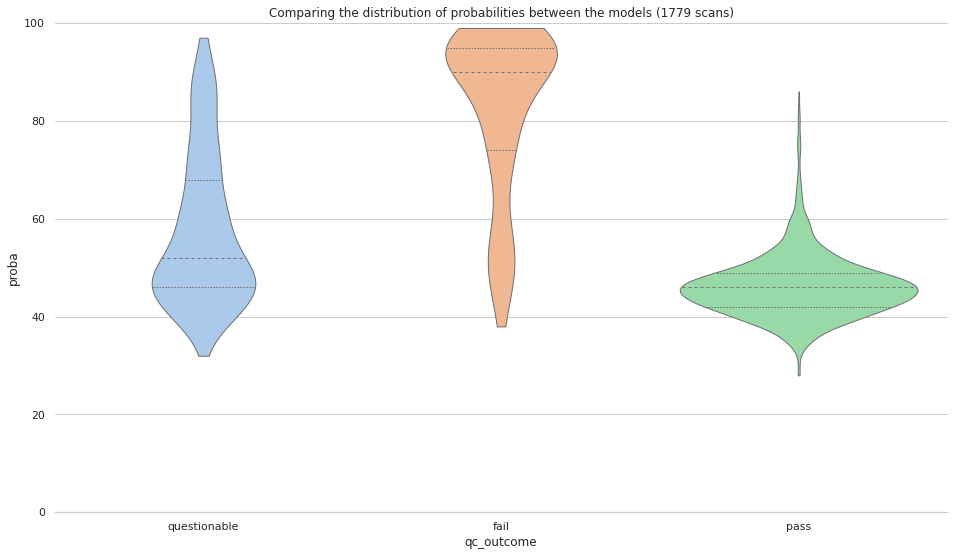

In [56]:
df_res152_abcd = pd.read_csv("results/protopnet/abcd_global_analysis_logs/abcd_group_results.csv", index_col=0)

df_abcd_true = pd.read_csv("results/protopnet/abcd_global_analysis_logs/downloaded_files_info.csv")
df_abcd_true["subid"] = df_abcd_true.filename.apply(lambda x: x.split(".")[0])


# df_abcd_preds = df_abcd_true.merge(df_res152_abcd, how='left', on='subid')[["qc_outcome", "proba", "pred"]]
down_files_info["subid"] = down_files_info.filename.apply(lambda x: x.split(".")[0])
df_abcd_preds = df_res152_abcd.merge(down_files_info, how='right', on='subid')


plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=df_abcd_preds, x="qc_outcome", y="proba",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.ylim(0,100)
plt.title("Comparing the distribution of probabilities between the models (1779 scans)")

Text(0.5, 1.0, 'Comparing the distribution of probabilities between the models (1779 scans)')

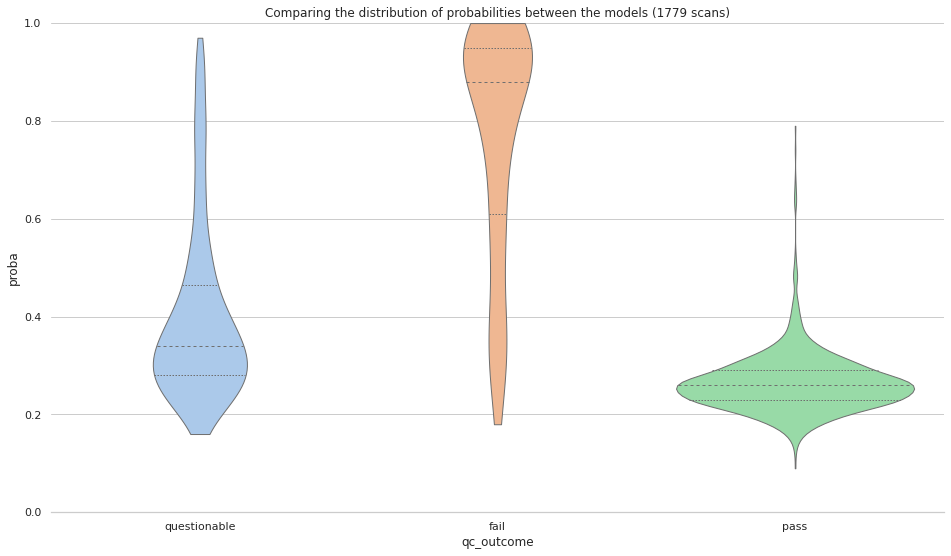

In [59]:
# df_cnn_results = pd.read_csv("results/CNN_baselines/group_results_densenet.csv")
# df_cnn_results = pd.read_csv("results/CNN_baselines/group_results_resnet.csv")
df_cnn_results = pd.read_csv("results/CNN_baselines/group_results_vgg.csv")


df_abcd_true = pd.read_csv("results/protopnet/abcd_global_analysis_logs/downloaded_files_info.csv")
df_abcd_true["subid"] = df_abcd_true.filename.apply(lambda x: x.split(".")[0])

down_files_info["subid"] = down_files_info.filename.apply(lambda x: x.split(".")[0])
df_abcd_preds2 = df_cnn_results.merge(down_files_info, how='right', on='subid')

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid", palette="pastel")
sns.violinplot(data=df_abcd_preds2, x="qc_outcome", y="proba",
               split=True, inner="quart", linewidth=1, cut=0)
sns.despine(left=True)
plt.ylim(0,1)
plt.title("Comparing the distribution of probabilities between the models (1779 scans)")

In [60]:
df_cnn_results

,subid,proba,t,pred,slices,axes,x_proba,y_proba,z_proba,x_pred,y_pred,z_pred
0,20161211-ST001-Elison_BSLERP_812574_01_01_MR-S...,0.23,7.52,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.39,0.11,0.18,0.0,0.0,0.0
1,20190507-ST001-MNBCP907184-v02-2-22mo_MR-SE002...,0.22,7.53,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.23,0.28,0.10,0.0,0.0,0.0
2,20180908-ST001-MNBCP830201-v02-1-15mo_MR-SE003...,0.21,7.56,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.24,0.24,0.12,0.0,0.0,0.0
3,20180911-ST001-MNBCP439037-v01-1-15mo_MR-SE003...,0.26,7.49,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.31,0.32,0.08,0.0,0.0,0.0
4,20180726-ST001-MNBCP185373-v01-2-20mo_MR-SE003...,0.25,7.53,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.33,0.27,0.11,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2135,MNBCP940808-v03-1-9mo-20170731_4_T1w,0.25,7.47,0.0,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.33,0.29,0.08,0.0,0.0,0.0
2136,NCBCP197622-v07-1-18mo_2_T1w,0.26,7.46,0.0,"[0, 1, 7, 10, 12, 13, 14, 16, 17, 18, 20, 22, ...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.28,0.38,0.07,0.0,0.0,0.0
2137,20190811-ST001-MNBCP240615-v03-1-28mo_MR-SE003...,0.25,7.51,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",0.26,0.34,0.10,0.0,0.0,0.0
2138,NCBCP404835-v02-2-65mo_13_T1w,0.99,7.55,1.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', ...",1.00,1.00,0.96,1.0,1.0,1.0


In [61]:
df_abcd_preds2.groupby("qc_outcome").pred.value_counts()

qc_outcome    pred
fail          1.0      162
              0.0       36
pass          0.0     1368
              1.0       11
questionable  0.0      445
              1.0      114
Name: pred, dtype: int64

In [62]:
df_abcd_preds2.groupby("qc_outcome").proba.describe()

,count,mean,std,min,25%,50%,75%,max
qc_outcome,,,,,,,,
fail,198.0,0.764242,0.237553,0.18,0.61,0.88,0.950,1.00
pass,1379.0,0.264518,0.060949,0.09,0.23,0.26,0.290,0.79
questionable,559.0,0.401449,0.180612,0.16,0.28,0.34,0.465,0.97


In [63]:
df_abcd_preds.groupby("qc_outcome").pred.value_counts()

qc_outcome    pred
fail          1.0      181
              0.0       17
pass          0.0     1137
              1.0      243
questionable  1.0      304
              0.0      255
Name: pred, dtype: int64

In [64]:
df_abcd_preds.groupby("qc_outcome").proba.describe()

,count,mean,std,min,25%,50%,75%,max
qc_outcome,,,,,,,,
fail,198.0,82.500000,17.030504,38.0,74.0,90.0,95.0,99.0
pass,1380.0,46.204348,6.441817,28.0,42.0,46.0,49.0,86.0
questionable,559.0,57.542039,15.449928,32.0,46.0,52.0,68.0,97.0


In [65]:
df_abcd_preds.groupby(["qc_outcome", "pred"]).proba.describe()

count       mean        std   min   25%   50%   75%   max
qc_outcome   pred                                                            
fail         0.0     17.0  45.764706   3.832907  38.0  44.0  46.0  49.0  50.0
             1.0    181.0  85.950276  13.292971  51.0  81.0  92.0  95.0  99.0
pass         0.0   1137.0  44.043096   3.822986  28.0  42.0  44.0  47.0  50.0
             1.0    243.0  56.316872   6.574620  51.0  52.0  54.0  58.0  86.0
questionable 0.0    255.0  44.603922   3.906887  32.0  42.0  45.0  48.0  50.0
             1.0    304.0  68.394737  12.951628  51.0  57.0  66.0  78.0  97.0

In [66]:
df_abcd_preds_combined = df_abcd_preds[["image03_id", "proba", "qc_outcome"]].merge(df_abcd_preds2[["image03_id", "proba"]], on="image03_id")

In [67]:
df_abcd_preds_combined["proba_combined"] = (df_abcd_preds_combined.proba_x + df_abcd_preds_combined.proba_y*100)/2
df_abcd_preds_combined["pred"] = df_abcd_preds_combined["proba_combined"].apply(lambda x: int(x > 50))

In [68]:
df_abcd_preds_combined.groupby("qc_outcome").pred.value_counts()

qc_outcome    pred
fail          1        167
              0         31
pass          0       1352
              1         32
questionable  0        367
              1        192
Name: pred, dtype: int64

In [69]:
## Trying a combination strategy

# # generate pred=0 if proba_y < 0.5, pred=1 if proba_x > 0.5, else return proba_x
# def compute_pred_combined(row_df):
#     if row_df["proba_x"] > 50:
#         return 1
#     elif row_df["proba_y"] <= 0.5:
#         return 0
#     else:
#         return int((row_df["proba_x"] + row_df["proba_y"]*10)/2 > 50)
    
# df_abcd_preds_combined["pred_combined"] = df_abcd_preds_combined.apply(compute_pred_combined, 1)

In [70]:
# df_abcd_preds_combined.groupby("qc_outcome").pred_combined.value_counts()

In [71]:
df_abcd_preds.query("proba > 50 & proba < 60").shape[0]

311

In [72]:
df_abcd_preds_no_btw_50_60 = df_abcd_preds.query("proba < 50 | proba > 60")
df_abcd_preds_no_btw_50_60.groupby(["qc_outcome", "pred"]).proba.describe()

count       mean        std   min    25%   50%    75%  \
qc_outcome   pred                                                           
fail         0.0     14.0  44.857143   3.613163  38.0  41.75  45.5  47.75   
             1.0    165.0  89.048485   9.174997  61.0  84.00  93.0  96.00   
pass         0.0   1077.0  43.711235   3.652569  28.0  41.00  44.0  47.00   
             1.0     36.0  69.277778   7.093704  61.0  63.75  67.0  75.00   
questionable 0.0    230.0  44.017391   3.661395  32.0  41.25  44.5  47.00   
             1.0    195.0  75.733333  10.309173  61.0  66.00  74.0  85.00   

                    max  
qc_outcome   pred        
fail         0.0   49.0  
             1.0   99.0  
pass         0.0   49.0  
             1.0   86.0  
questionable 0.0   49.0  
             1.0   97.0

In [73]:
1077/(1077+36)

0.967654986522911

In [74]:
165/(165+14)

0.9217877094972067

Area of uncertainty with proba between 50 and 60 !  
--> verify scans between these values

In [75]:
df_abcd_preds[df_abcd_preds.qc_outcome == "questionable"].qc_description.value_counts()

Use this one    26
Name: qc_description, dtype: int64

In [76]:
df_abcd_preds[(df_abcd_preds.qc_outcome == "questionable") & (df_abcd_preds.qc_description == "Use this one")].pred.value_counts()

0.0    15
1.0    11
Name: pred, dtype: int64

In [77]:
df_abcd_preds[(df_abcd_preds.qc_outcome == "questionable") & (df_abcd_preds.qc_description == "Use this one")].groupby("pred").proba.describe()

,count,mean,std,min,25%,50%,75%,max
pred,,,,,,,,
0.0,15.0,44.200000,4.296178,37.0,40.5,46.0,47.5,50.0
1.0,11.0,72.818182,7.180782,61.0,69.5,74.0,75.0,85.0


over 26 scans qc_outcome = questionable and qc_descript = "use this one": 15 predicted pass / 11 predicted fail 

In [78]:
df_abcd_preds.groupby("qc_description").pred.value_counts()

qc_description  pred
Use             0.0      1
Use this one    0.0     65
                1.0     33
use this one    0.0      3
                1.0      1
Name: pred, dtype: int64

In [79]:
1+67+36+3+1

108

In [80]:
(1+67+3)/108

0.6574074074074074

In [81]:
df_abcd_preds.groupby(["qc_description", "pred"]).proba.describe()

count       mean       std   min   25%   50%   75%   max
qc_description pred                                                          
Use            0.0     1.0  45.000000       NaN  45.0  45.0  45.0  45.0  45.0
Use this one   0.0    65.0  44.492308  3.791945  35.0  42.0  45.0  47.0  50.0
               1.0    33.0  61.848485  9.526677  51.0  54.0  60.0  66.0  85.0
use this one   0.0     3.0  45.666667  4.041452  41.0  44.5  48.0  48.0  48.0
               1.0     1.0  77.000000       NaN  77.0  77.0  77.0  77.0  77.0

In [82]:
96/108

0.8888888888888888

In [83]:
df_abcd_preds2.groupby(["qc_description", "pred"]).proba.describe()

count      mean       std   min    25%    50%     75%  \
qc_description pred                                                          
Use            0.0     1.0  0.270000       NaN  0.27  0.270  0.270  0.2700   
Use this one   0.0    91.0  0.289121  0.063660  0.09  0.245  0.280  0.3200   
               1.0     7.0  0.631429  0.096683  0.51  0.550  0.670  0.6900   
use this one   0.0     4.0  0.327500  0.097425  0.25  0.280  0.295  0.3425   

                      max  
qc_description pred        
Use            0.0   0.27  
Use this one   0.0   0.49  
               1.0   0.76  
use this one   0.0   0.47

In [84]:
subids_fail_pred_0 = df_abcd_preds[(df_abcd_preds.pred == 0) & (df_abcd_preds.qc_outcome == "fail")].filename.tolist()
subids_pass_pred_1 = df_abcd_preds[(df_abcd_preds.pred == 1) & (df_abcd_preds.qc_outcome == "pass")].filename.tolist()

In [85]:
np.random.seed(42)
subids_pass_pred_0 = df_abcd_preds[(df_abcd_preds.pred == 0) & (df_abcd_preds.qc_outcome == "pass")].filename.tolist()
subids_fail_pred_1 = df_abcd_preds[(df_abcd_preds.pred == 1) & (df_abcd_preds.qc_outcome == "fail")].filename.tolist()
subids_questionable = df_abcd_preds[df_abcd_preds.qc_outcome == "questionable"].filename.tolist()
# Picking randomly 50 scans in each set
subids_pass_pred_0 = list(np.random.choice(subids_pass_pred_0, 50, replace=False))
subids_fail_pred_1 = list(np.random.choice(subids_fail_pred_1, 50, replace=False))
subids_questionable = list(np.random.choice(subids_questionable, 50, replace=False))

In [86]:
files_to_mriqc = subids_fail_pred_0 + subids_pass_pred_1 + subids_pass_pred_0 + subids_fail_pred_1 + subids_questionable
df_to_mriqc = df_abcd_preds[[x in files_to_mriqc for x in df_abcd_preds.filename]][["filename", "image03_id", "qc_outcome", "proba", "pred"]]

In [87]:
df_to_mriqc.shape

(410, 5)

In [88]:
# df_to_mriqc.sort_values(by="image03_id").to_csv("./df_to_mriqc.csv", header=None, index=None)

In [89]:
df_to_mriqc2 = pd.DataFrame(df_to_mriqc["image03_id"].tolist(), columns=["participants_id"])

In [90]:
# df_to_mriqc2.sort_values(by="participants_id").to_csv("./df_to_mriqc.tsv", index=None)